https://machinelearningmastery.com/selectively-scale-numerical-input-variables-for-machine-learning/

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

dataframe = pd.read_csv( url , header = None )

data = dataframe.values

In [5]:
dataframe.head( 5 ) 

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = data[ : ,  : -1 ]

y = data[ : , -1 ]

# Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CC017B8>,
      dtype=object)

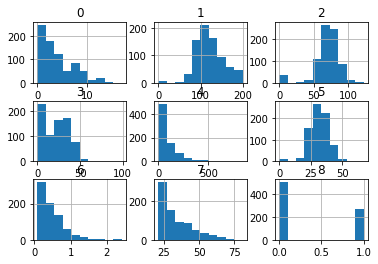

In [6]:
dataframe.hist()

# Evaluating a model on the raw dataset

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression( solver = 'liblinear' )

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 )

In [13]:
from numpy import mean

from numpy import std

In [14]:
print( f'ACCURACY : {mean( scores ):.3f} ( {std( scores ):.3f} )' )

ACCURACY : 0.769 ( 0.045 )


# Selective Scaling of Numerical Inputs

In [15]:
# Indices des colonnes à distribution normale -> MinMaxScaler
norm_ix = [ 1 , 2 , 5 ]

# Indices des colonnes à distribution exponentielle -> StandardScaler
exp_ix = [ 0 , 3 , 4 , 6 , 7 ]

In [16]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

In [17]:
# selective transforms

transforms = [ ( 'minmaxscaler' , MinMaxScaler() , exp_ix ) ,
               ( 'standardscaler' , StandardScaler() , norm_ix ) ]

select_transforms = ColumnTransformer( transformers = transforms )

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression( solver = 'liblinear' )

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
steps = [ ( 'select_transforms' , select_transforms ) ,
          ( 'model' , model ) ]

pipeline = Pipeline( steps = steps )

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [31]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

In [32]:
scores = cross_val_score( pipeline , X , y , scoring = 'accuracy' , cv = cv , n_jobs = 999 )

Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "C:\Users\FAB\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\FAB\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\FAB\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 615, in _queue_management_worker
    ready = wait(readers + worker_sentinels)
  File "C:\Users\FAB\Anaconda3\lib\multiprocessing\connection.py", line 868, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\FAB\Anaconda3\lib\multiprocessing\connection.py", line 800, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 478



PermissionError: [WinError 5] Accès refusé